Import Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Import Neccessary libraries
import numpy as np
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

#Import Sampler libraries
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.pipeline import Pipeline as imbPipeline

# Set the decimal format
pd.options.display.float_format = "{:.2f}".format

Input Data

In [ ]:
# Load dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [53]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,non-smoker,25.19,6.60,140,0
1,Female,54.00,0,0,non-smoker,27.32,6.60,80,0
2,Male,28.00,0,0,non-smoker,27.32,5.70,158,0
3,Female,36.00,0,0,current_smoker,23.45,5.00,155,0
4,Male,76.00,1,1,current_smoker,20.14,4.80,155,0


EXPLORATORY DATA ANALYSIS


*   Data Quality
*  Handling Duplicates



In [ ]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (3854, 9)


In [ ]:
df = df.drop_duplicates()

Uniqueness

In [ ]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


In [ ]:
# Get the unique values in the 'gender' column
distinct_genders = df['gender'].unique()

# Print the distinct values
print("Distinct values in the 'gender' column:")
print(distinct_genders)

Distinct values in the 'gender' column:
['Female' 'Male' 'Other']


Missing Values

In [ ]:
# Checking null values
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
# Remove Unneccessary value [0.00195%]
df = df[df['gender'] != 'Other']

Describe the Data

In [ ]:
df.describe().style.format("{:.2f}")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00
mean,41.80,0.08,0.04,27.32,5.53,138.22,0.09
std,22.46,0.27,0.20,6.77,1.07,40.91,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.40,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,59.00,0.00,0.00,29.86,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


Univariate Analysis

Histogram for age

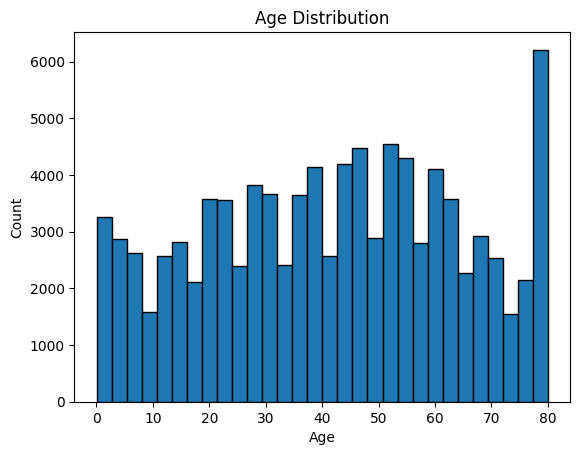

In [ ]:
# Histogram for age
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Bar plot for gender

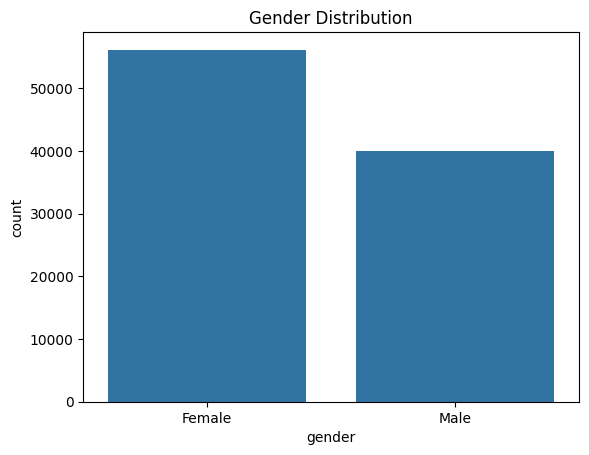

In [ ]:
# Bar plot for gender
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

Distribution for BMI

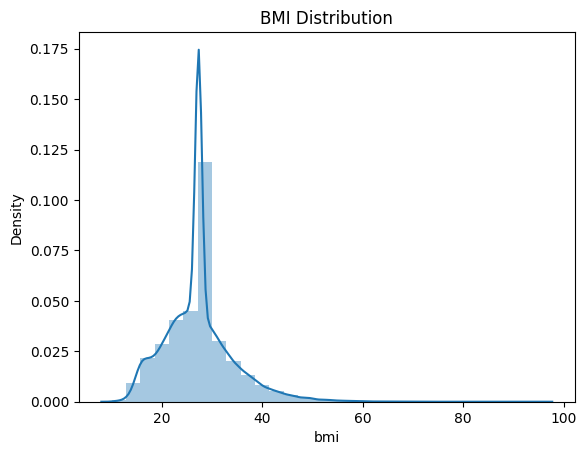

In [ ]:
# Distribution plot for BMI
sns.distplot(df['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

Count plots for binary variables

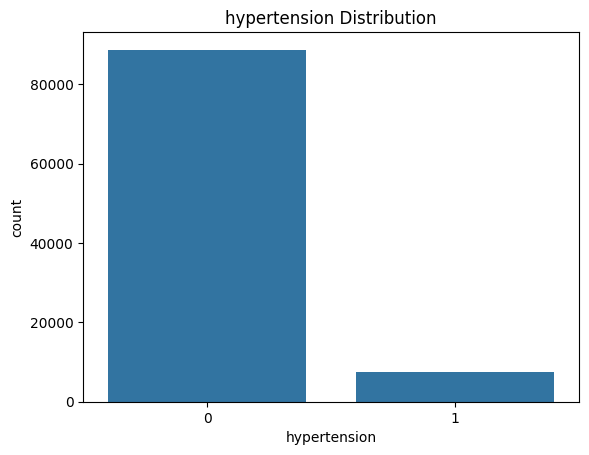

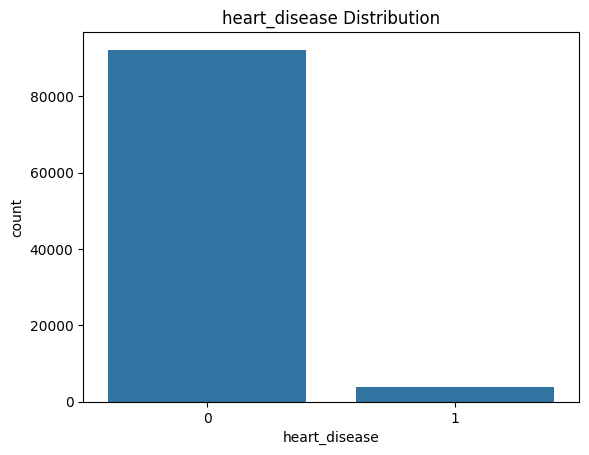

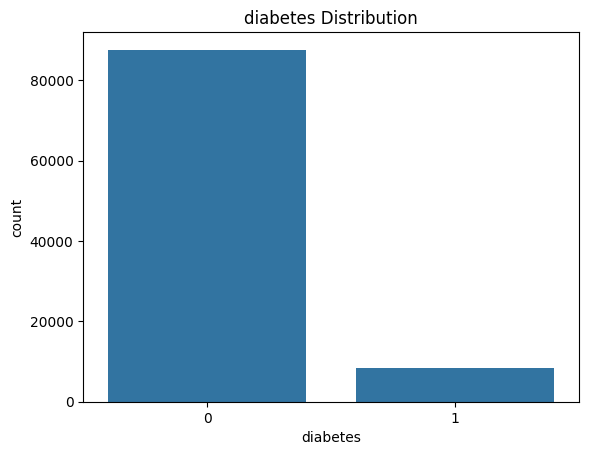

In [ ]:
# Count plots for binary variables
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.show()

Count plot for smoking history

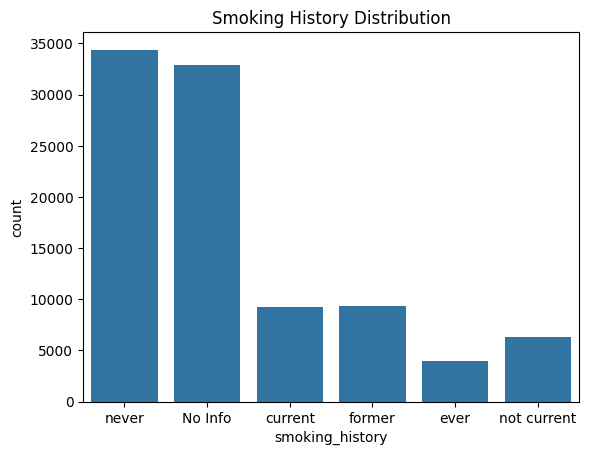

In [ ]:
# Count plot for smoking history
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.show()

Bivariative Analysis
Boxplot BMI vs Diabetes classification

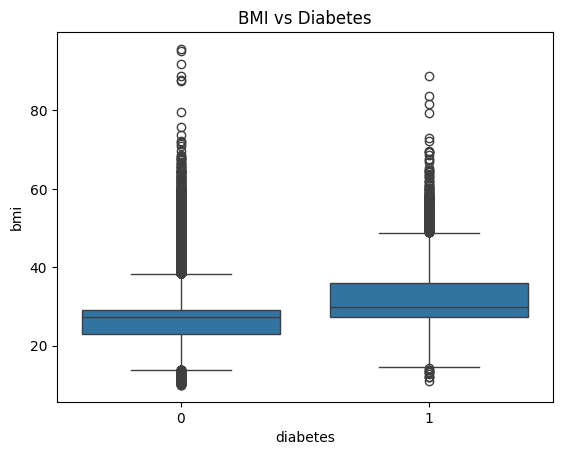

In [ ]:
# Boxplot BMI vs Diabetes classification
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI vs Diabetes')
plt.show()

Boxplot Age vs Diabetes Classification

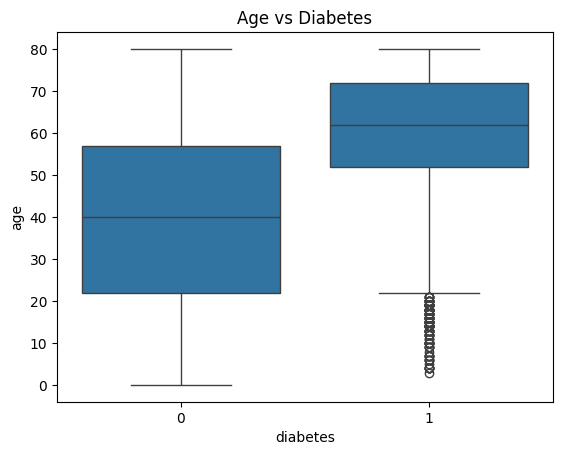

In [ ]:
# Boxplot Age vs Diabetes classification
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age vs Diabetes')
plt.show()

Count plot of gender vs diabetes

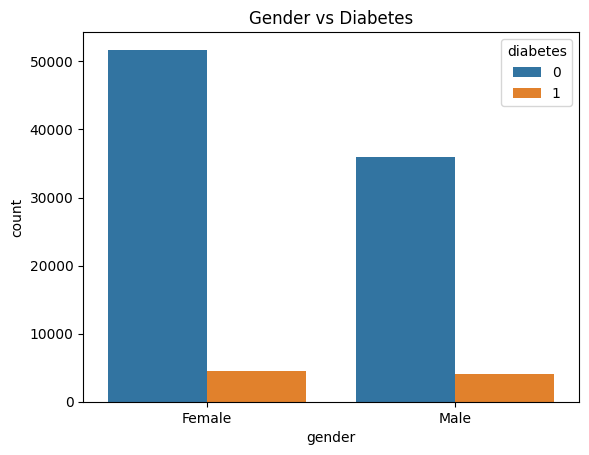

In [ ]:
# Count plot of gender vs diabetes
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender vs Diabetes')
plt.show()

Boxplot HbA1c level vs Diabetes classification

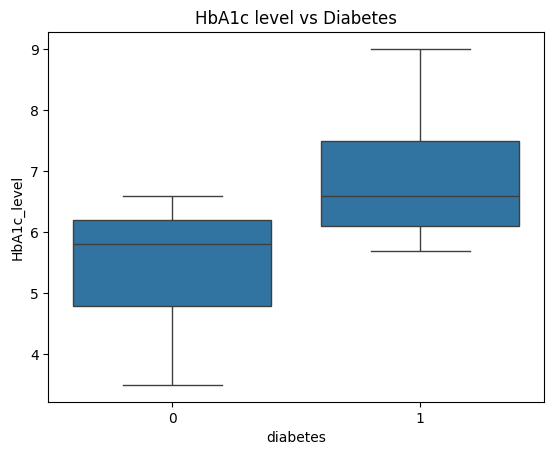

In [ ]:
# Boxplot HbA1c level vs Diabetes classification
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c level vs Diabetes')
plt.show()

### <b>IV <span style='color:#16C2D5'>|</span> Boxplot blood glucose level vs Diabetes classification</b>

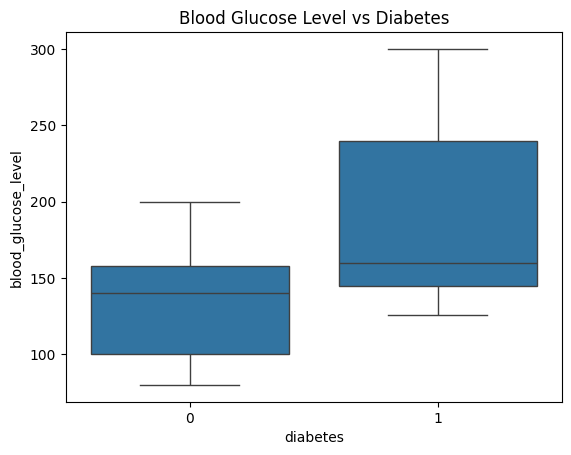

In [ ]:
# Boxplot blood glucose level vs Diabetes classification
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

Multivariate analysis
I | Scatterplot Age vs BMI colored by Diabetes classification

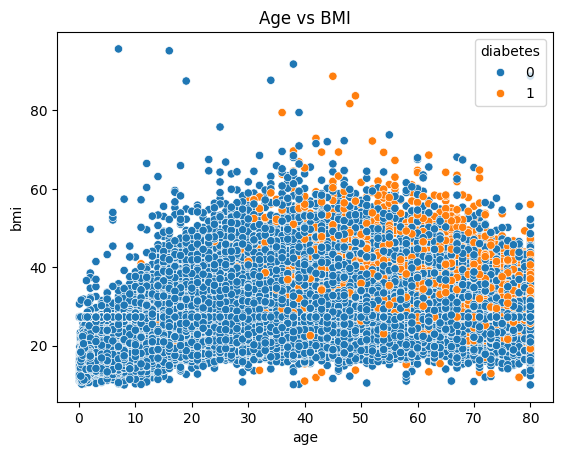

In [ ]:
# Scatterplot Age vs BMI colored by Diabetes classification
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df)
plt.title('Age vs BMI')
plt.show()

Violin plot of BMI against diabetes classification split by gender

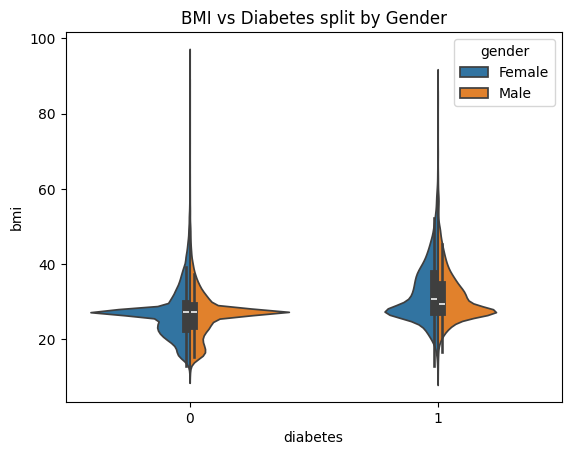

In [ ]:
# Violin plot of BMI against diabetes classification split by gender
sns.violinplot(x='diabetes', y='bmi', hue='gender', split=True, data=df)
plt.title('BMI vs Diabetes split by Gender')
plt.show()

Interaction between gender, BMI and diabetes

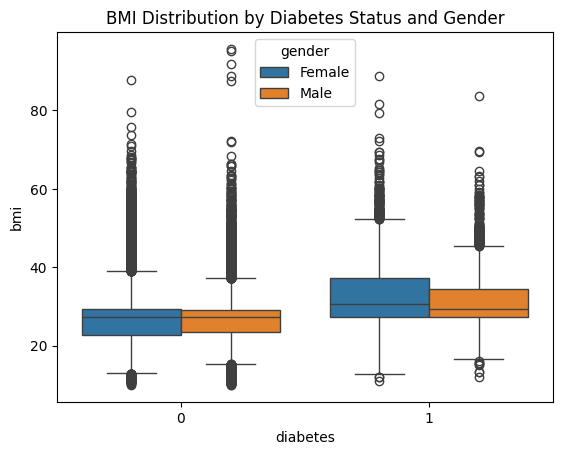

In [ ]:
# Interaction between gender, BMI and diabetes
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df)
plt.title('BMI Distribution by Diabetes Status and Gender')
plt.show()

Interaction between gender, Age and diabetes

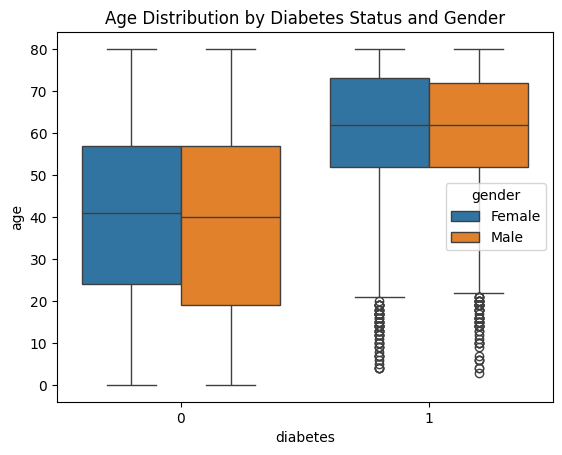

In [ ]:
# Interaction between gender, Age and diabetes
sns.boxplot(x='diabetes', y='age', hue='gender', data=df)
plt.title('Age Distribution by Diabetes Status and Gender')
plt.show()

CORRELATION
Data Preparation


In [ ]:
# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current_smoker'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(df['smoking_history'].value_counts())

smoking_history
non-smoker        67276
past_smoker       19655
current_smoker     9197
Name: count, dtype: int64


In [ ]:
data = df.copy()

Encoding

In [ ]:
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

# Perform one-hot encoding on the gender variable
data = perform_one_hot_encoding(data, 'gender')

# Perform one-hot encoding on the smoking history variable
data = perform_one_hot_encoding(data, 'smoking_history')

Correlation Matrix

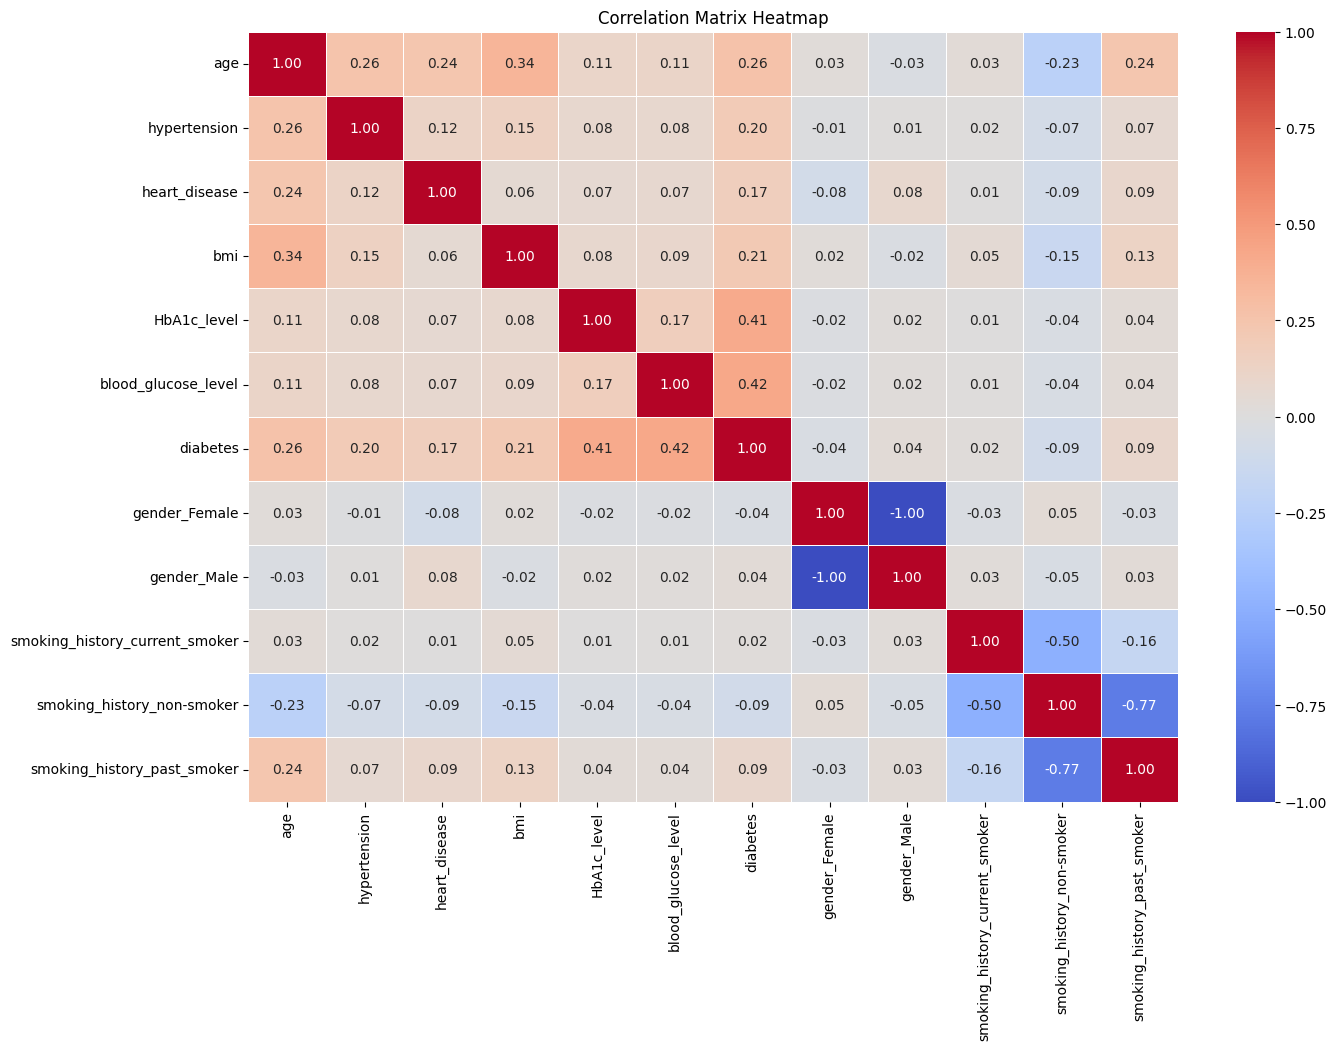

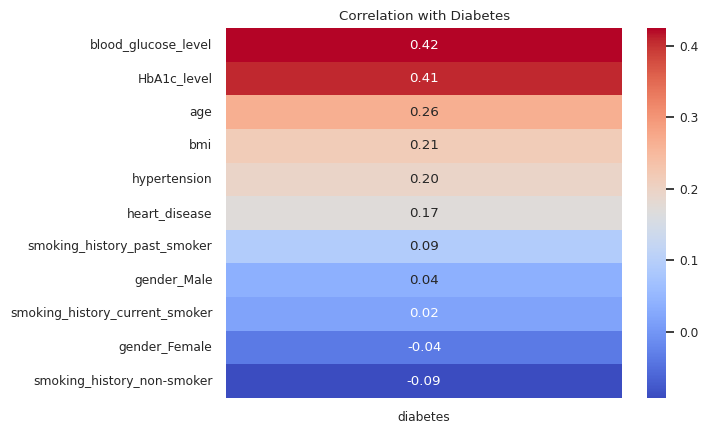

In [ ]:
# Compute the correlation matrix
correlation_matrix = data.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


#Graph II
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

Data Preprocessing

In [ ]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']),
        ('cat', OneHotEncoder(), ['gender','smoking_history'])
    ])

# Split data into features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

Tain test Split and Stratified K fold validation

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold

# Assuming df is your DataFrame and it has been loaded and preprocessed
# Define preprocessor (as you have in your notebook)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']),
        ('cat', OneHotEncoder(), ['gender','smoking_history'])
    ])

# Separate features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Apply the preprocessor to your data
X_processed = preprocessor.fit_transform(X)

# Set up Stratified K-Fold cross-validator (5 folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through the folds
print("Stratified K-Fold splits:")
for fold, (train_index, test_index) in enumerate(skf.split(X_processed, y)):
    X_train_fold, X_test_fold = X_processed[train_index], X_processed[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    print(f"Fold {fold + 1}:")
    print(f"  Training set shape: {X_train_fold.shape}, {y_train_fold.shape}")
    print(f"  Testing set shape: {X_test_fold.shape}, {y_test_fold.shape}")
    print("-" * 20)

Stratified K-Fold splits:
Fold 1:
  Training set shape: (76902, 11), (76902,)
  Testing set shape: (19226, 11), (19226,)
--------------------
Fold 2:
  Training set shape: (76902, 11), (76902,)
  Testing set shape: (19226, 11), (19226,)
--------------------
Fold 3:
  Training set shape: (76902, 11), (76902,)
  Testing set shape: (19226, 11), (19226,)
--------------------
Fold 4:
  Training set shape: (76903, 11), (76903,)
  Testing set shape: (19225, 11), (19225,)
--------------------
Fold 5:
  Training set shape: (76903, 11), (76903,)
  Testing set shape: (19225, 11), (19225,)
--------------------


In [63]:
import joblib

# Assuming preprocessor is already defined and fitted
joblib.dump(preprocessor, 'preprocessor.pkl')
print("Preprocessor saved.")

Preprocessor saved.


In [62]:
print(X_train_fold[:5])

[[ 1.70070880e+00 -3.14941043e-01  9.94547463e-01  4.35579675e-02
  -2.90079817e-01  4.84806107e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 5.43260798e-01 -2.14288114e-04  9.94547463e-01 -1.42304109e+00
  -2.90079817e-01 -2.06268029e-01  1.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [-6.14187201e-01 -2.14288114e-04  1.55949002e-01  4.83537684e-01
  -2.90079817e-01 -2.06268029e-01  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 1.52263987e+00 -1.06112420e+00 -6.82649460e-01  4.10207731e-01
   3.44732705e+00  4.84806107e+00  0.00000000e+00  1.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-9.70325047e-01 -2.14288114e-04  9.94547463e-01 -1.30082450e+00
  -2.90079817e-01 -2.06268029e-01  1.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00]]


Feature Selection
*   Chi-Square Test for Categorical Features
*   Pearson's Correlation for Numerical Features



In [ ]:
from sklearn.feature_selection import chi2, SelectKBest
from scipy.stats import pearsonr

# Make sure 'data' is the DataFrame you want to perform feature selection on.

# Separate features (X) and target (y)
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=np.number).columns

print("Categorical columns:", categorical_cols.tolist())
print("Numerical columns:", numerical_cols.tolist())


# Select categorical features that are already encoded in 'data'
encoded_categorical_cols = [col for col in X.columns if 'gender_' in col or 'smoking_history_' in col]
print("Encoded categorical columns for Chi-Square:", encoded_categorical_cols)

if encoded_categorical_cols:
    X_categorical = X[encoded_categorical_cols]

    # Apply Chi-Square test
    chi2_scores, p_values_chi2 = chi2(X_categorical, y)

    # Create a DataFrame to display Chi-Square results
    chi2_results = pd.DataFrame({'feature': encoded_categorical_cols,
                                 'chi2_score': chi2_scores,
                                 'p_value': p_values_chi2})

    print("\nChi-Square Test Results (Categorical Features):")
    print(chi2_results.sort_values(by='chi2_score', ascending=False))
else:
    print("\nNo encoded categorical columns found for Chi-Square test.")

# --- Feature Selection for Numerical Features (Pearson's Correlation) ---

print("\nPearson's Correlation Results (Numerical Features):")
numerical_correlation_results = []
for col in numerical_cols:
    # Calculate Pearson's correlation coefficient and p-value
    correlation, p_value_pearson = pearsonr(X[col], y)
    numerical_correlation_results.append({'feature': col,
                                          'pearson_correlation': correlation,
                                          'p_value': p_value_pearson})

# Create a DataFrame to display Pearson's correlation results
pearson_results = pd.DataFrame(numerical_correlation_results)

# Sort by absolute correlation value in descending order
pearson_results['abs_correlation'] = abs(pearson_results['pearson_correlation'])
print(pearson_results.sort_values(by='abs_correlation', ascending=False))

Categorical columns: []
Numerical columns: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
Encoded categorical columns for Chi-Square: ['gender_Female', 'gender_Male', 'smoking_history_current_smoker', 'smoking_history_non-smoker', 'smoking_history_past_smoker']

Chi-Square Test Results (Categorical Features):
                          feature  chi2_score  p_value
4     smoking_history_past_smoker      655.01     0.00
3      smoking_history_non-smoker      246.13     0.00
1                     gender_Male       80.40     0.00
0                   gender_Female       57.22     0.00
2  smoking_history_current_smoker       25.18     0.00

Pearson's Correlation Results (Numerical Features):
               feature  pearson_correlation  p_value  abs_correlation
5  blood_glucose_level                 0.42     0.00             0.42
4          HbA1c_level                 0.41     0.00             0.41
0                  age                 0.26     0.00     

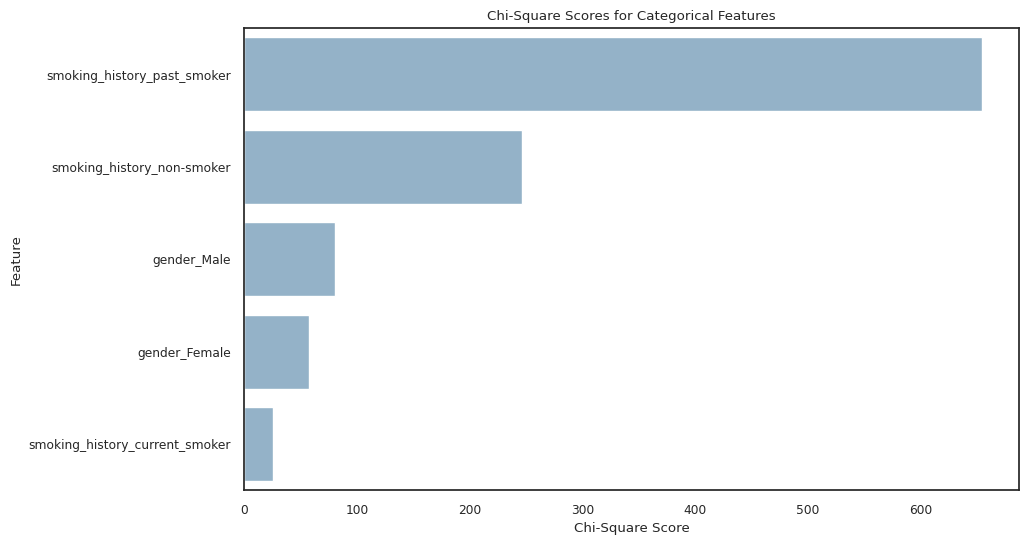

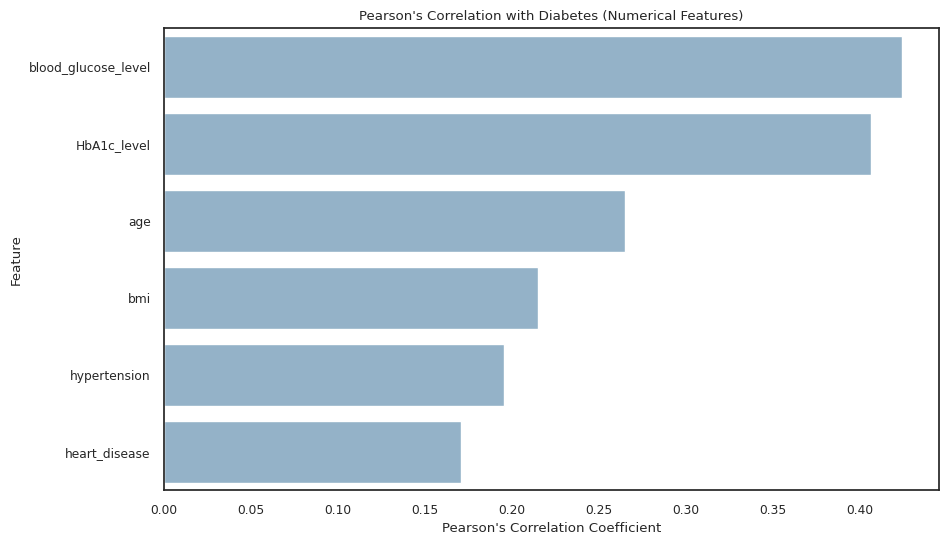

In [ ]:

# --- Visualization for Chi-Square Results (Categorical Features) ---
if not chi2_results.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='chi2_score', y='feature', data=chi2_results.sort_values(by='chi2_score', ascending=False))
    plt.title('Chi-Square Scores for Categorical Features')
    plt.xlabel('Chi-Square Score')
    plt.ylabel('Feature')
    plt.show()

else:
    print("No Chi-Square results to visualize.")

# --- Visualization for Pearson's Correlation Results (Numerical Features) ---
if not pearson_results.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='pearson_correlation', y='feature', data=pearson_results.sort_values(by='abs_correlation', ascending=False))
    plt.title('Pearson\'s Correlation with Diabetes (Numerical Features)')
    plt.xlabel('Pearson\'s Correlation Coefficient')
    plt.ylabel('Feature')
    plt.show()

else:
    print("No Pearson's Correlation results to visualize.")

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


Training Base Learners


*   Random Forest
*   Multi Layer Perceptron
*   Linear Logistic Regression

Random Forest with RandomizedSearchCV

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Step 1: Define the base estimator
rf = RandomForestRegressor(random_state=42)

# Step 2: Define the hyperparameter search space
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Step 3: Set up the randomized search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Step 4: Fit to training data
random_search.fit(X_train, y_train)


# The trained Random Forest model is stored in random_search

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x781459ead350>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x781459cc7b90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x781459ee7c90>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

Multi Layer Perceptron with Optuna

In [ ]:
!pip install optuna==3.4.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 17.4 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from optuna.pruners import MedianPruner


# Assuming X_processed and y are already defined from your data preprocessing

# Split data for Optuna tuning to use a subset
# Using 30% of the data for tuning as requested
X_tune, _, y_tune, _ = train_test_split(X_processed, y, test_size=0.7, random_state=42, stratify=y)


def objective(trial):
    # Define hyperparameters to tune
    hidden_layer_sizes = []
    for i in range(trial.suggest_int('n_layers', 1, 3)):
        hidden_layer_sizes.append(trial.suggest_int(f'n_units_l{i}', 32, 128))

    alpha = trial.suggest_float('alpha', 1e-5, 1e-1, log=True)
    learning_rate_init = trial.suggest_float('learning_rate_init', 1e-4, 1e-2, log=True)
    beta_1 = trial.suggest_float('beta_1', 0.5, 0.999)
    beta_2 = trial.suggest_float('beta_2', 0.9, 0.9999)
    epsilon = trial.suggest_float('epsilon', 1e-9, 1e-7, log=True)


    # Create MLPRegressor with suggested hyperparameters
    model = MLPRegressor(
        hidden_layer_sizes=tuple(hidden_layer_sizes),
        alpha=alpha,
        solver='adam',  # Use 'adam' as specified
        learning_rate_init=learning_rate_init,
        max_iter=500,  # Cap max_iter at 500
        early_stopping=True,  # Keep early_stopping True
        random_state=42,
        beta_1=beta_1,
        beta_2=beta_2,
        epsilon=epsilon
    )

    # Evaluate the model using mean squared error on the tuning subset
    try:
        model.fit(X_tune, y_tune)
        y_pred = model.predict(X_tune) # Evaluate on the tuning set
        mse = mean_squared_error(y_tune, y_pred)
        return mse
    except Exception as e:
        # Handle potential errors during training (e.g., convergence issues)
        return float('inf') # Return infinity for invalid trials


# Create an Optuna study with MedianPruner
study = optuna.create_study(direction='minimize', pruner=MedianPruner())

# Run the optimization
# Reduce n_trials to 30 as specified
study.optimize(objective, n_trials=30)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters found by Optuna:", best_params)

# Train the final MLP model with the best hyperparameters on the full training data

final_mlp_model = MLPRegressor(
    hidden_layer_sizes=tuple(best_params['n_units_l' + str(i)] for i in range(best_params['n_layers'])),
    alpha=best_params['alpha'],
    solver='adam',
    learning_rate_init=best_params['learning_rate_init'],
    max_iter=500,
    early_stopping=True,
    random_state=42,
    beta_1=best_params['beta_1'],
    beta_2=best_params['beta_2'],
    epsilon=best_params['epsilon']
)

# Train the final model on the full training data

final_mlp_model.fit(X_train_fold, y_train_fold)

print("\nFinal MLP model trained with best hyperparameters.")

[I 2025-05-20 17:09:54,242] A new study created in memory with name: no-name-3c6212f9-3354-4f23-9d0b-cbe565bbc1ab
[I 2025-05-20 17:10:51,100] Trial 0 finished with value: 0.023090366895386967 and parameters: {'n_layers': 2, 'n_units_l0': 106, 'n_units_l1': 33, 'alpha': 0.007230678556413513, 'learning_rate_init': 0.0029554974431260025, 'beta_1': 0.6833342297917768, 'beta_2': 0.9780238121498004, 'epsilon': 2.060668989844737e-09}. Best is trial 0 with value: 0.023090366895386967.
[I 2025-05-20 17:11:12,880] Trial 1 finished with value: 0.026130164009784372 and parameters: {'n_layers': 1, 'n_units_l0': 121, 'alpha': 0.001803492388986805, 'learning_rate_init': 0.0003442494386591212, 'beta_1': 0.8030932539855336, 'beta_2': 0.9989414803170601, 'epsilon': 5.7654615839516505e-08}. Best is trial 0 with value: 0.023090366895386967.
[I 2025-05-20 17:11:22,992] Trial 2 finished with value: 0.027831276229717157 and parameters: {'n_layers': 1, 'n_units_l0': 42, 'alpha': 0.00040837337761637395, 'learn

Best hyperparameters found by Optuna: {'n_layers': 3, 'n_units_l0': 54, 'n_units_l1': 120, 'n_units_l2': 74, 'alpha': 1.902348004778134e-05, 'learning_rate_init': 0.0008780287438387107, 'beta_1': 0.7098276584902264, 'beta_2': 0.9538433427232134, 'epsilon': 2.876887959677424e-08}

Final MLP model trained with best hyperparameters.


In [ ]:
# 3. Linear Regression (as baseline)
from sklearn.linear_model import LinearRegression
print("\nTraining Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print("Linear Regression training complete.")


Training Linear Regression...
Linear Regression training complete.


Training the Meta Learner: XGBoost with optuna

In [ ]:
!pip install xgboost==1.7.6

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 5.6 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4


In [ ]:
# Install libraries if not already installed
# !pip install xgboost==1.7.6
# !pip install optuna==3.4.0
# !pip install scikit-learn==1.3.0

import optuna
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import mean_squared_error # Or a classification metric if more appropriate
from optuna.pruners import MedianPruner
from sklearn.linear_model import LinearRegression # Import LinearRegression
from sklearn.neural_network import MLPRegressor # Import MLPRegressor
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor

# Assume you have your original training and test data:
# X_train, y_train, X_test, y_test

# Assume your trained base models are stored in these variables:
# lr_model
# final_mlp_model
# random_search (which is a RandomizedSearchCV object, access the best estimator)

# List of your trained base models and their names
# Accessing the best estimator from random_search for Random Forest
base_models_trained = [
    ('lr', lr_model),
    ('mlp', final_mlp_model),
    ('rf', random_search.best_estimator_) # Use the best model found by RandomizedSearchCV
]

# 1. Generate Out-of-Fold Predictions (Meta-Learner Training Data)

# Define the number of folds for generating out-of-fold predictions
n_splits_oof = 5
skf_oof = StratifiedKFold(n_splits=n_splits_oof, shuffle=True, random_state=42)

# Create arrays to store out-of-fold predictions and true values for the meta-learner training
oof_preds = np.zeros((X_train.shape[0], len(base_models_trained)))
oof_y = np.zeros((X_train.shape[0],))

print("Generating out-of-fold predictions for meta-learner training data...")

# Iterate through the folds of the original training data
for fold, (train_index, val_index) in enumerate(skf_oof.split(X_train, y_train)):
    print(f"  Processing OOF Fold {fold + 1}/{n_splits_oof}")
    # Use direct NumPy array slicing for X_train (which is a NumPy array)
    X_train_fold_oof, X_val_fold_oof = X_train[train_index], X_train[val_index]
    # Use .iloc for y_train (which is a pandas Series with potentially non-contiguous index)
    y_train_fold_oof, y_val_fold_oof = y_train.iloc[train_index], y_train.iloc[val_index]

    # Store the true y values for this fold as a NumPy array
    oof_y[val_index] = y_val_fold_oof.values

    # For each base model, train it on the current fold's training data
    # and predict on the current fold's validation data (out-of-fold)
    for i, (name, model_template) in enumerate(base_models_trained):
        # Create a fresh instance of the model type for training on the fold data
        # This is crucial to get predictions on the validation fold the model hasn't seen
        if name == 'lr':
            fold_model = LinearRegression()
        elif name == 'mlp':
            # Instantiate MLP with the best parameters found by Optuna
            # You would need to store or access the best parameters from your MLP Optuna run
            # For simplicity here, we'll use some common params or you can hardcode the best ones
            # It's better to pass the best params from your MLP tuning here
            fold_model = MLPRegressor(random_state=42, max_iter=500, early_stopping=True)
            # If you have best_params from MLP Optuna, use them like:
            # fold_model = MLPRegressor(random_state=42, **your_mlp_best_params)
        elif name == 'rf':
             # Instantiate Random Forest with the best parameters found by RandomizedSearchCV
             # Accessing the best parameters from the random_search object
             rf_best_params = random_search.best_params_
             fold_model = RandomForestRegressor(random_state=42, **rf_best_params)
        else:
            continue # Skip if model type is not recognized

        fold_model.fit(X_train_fold_oof, y_train_fold_oof)

        # Make predictions on the validation fold (out-of-fold)
        fold_preds = fold_model.predict(X_val_fold_oof)

        # Store the predictions
        oof_preds[val_index, i] = fold_preds

print("Out-of-fold prediction generation complete.")

# The generated meta-learner training data is now oof_preds (features) and oof_y (target)

# 2. Split Meta-Learner Training Data for Hyperparameter Tuning

# Split the out-of-fold data into a training set and a validation set for tuning
# Ensure y_meta_train and y_meta_val are NumPy arrays or Series that can be stratified
# If oof_y is already a NumPy array, stratify works directly on it
X_meta_train, X_meta_val, y_meta_train, y_meta_val = train_test_split(
    oof_preds, oof_y, test_size=0.3, random_state=42, stratify=oof_y
)

print(f"Meta-learner tuning train set shape: {X_meta_train.shape}, {y_meta_train.shape}")
print(f"Meta-learner tuning validation set shape: {X_meta_val.shape}, {y_meta_val.shape}")


# 3. Optuna Hyperparameter Optimization for the Meta-Learner

def objective_meta(trial):
    """Optuna objective function for XGBoost meta-learner hyperparameter optimization."""

    model = xgb.XGBRegressor(
        n_estimators=trial.suggest_int("n_estimators", 100, 400),
        max_depth=trial.suggest_int("max_depth", 2, 8),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.3),
        subsample=trial.suggest_float("subsample", 0.6, 1.0),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.5, 1.0),
        min_child_weight=trial.suggest_int("min_child_weight", 1, 10),
        gamma=trial.suggest_float("gamma", 0, 5),
        reg_alpha=trial.suggest_float("reg_alpha", 0, 1),
        reg_lambda=trial.suggest_float("reg_lambda", 0, 1),
        objective='reg:squarederror',
        random_state=42
    )

    try:
        # Train the meta-learner on the meta-learner training split
        model.fit(X_meta_train, y_meta_train)

        # Evaluate the meta-learner on the meta-learner validation split
        y_pred_meta_val = model.predict(X_meta_val)

        # Calculate the metric to minimize (Mean Squared Error for regression)
        mse_meta_val = mean_squared_error(y_meta_val, y_pred_meta_val)

        return mse_meta_val

    except Exception as e:
        print(f"Trial failed: {e}")
        return float('inf')

# Create Optuna study for meta-learner tuning
study_xgb_meta = optuna.create_study(direction='minimize', pruner=MedianPruner())

# Run optimization on the meta-learner training and validation split
print("\nRunning Optuna optimization for XGBoost meta-learner...")
study_xgb_meta.optimize(objective_meta, n_trials=50) # Adjust n_trials as needed

# Get best hyperparameters for the meta-learner
best_params_xgb_meta = study_xgb_meta.best_params
print("Best hyperparameters found by Optuna for meta-learner:", best_params_xgb_meta)

# 4. Train the Final Meta-Learner on the Entire Out-of-Fold Data

# Train the final XGBoost meta-learner with the best hyperparameters
# using the entire generated out-of-fold dataset (oof_preds, oof_y)
final_xgb_meta_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, **best_params_xgb_meta)

print("\nTraining final meta-learner on the entire out-of-fold data...")
final_xgb_meta_model.fit(oof_preds, oof_y)
print("Final meta-learner training complete.")

# Now you have:
# 1. Your original trained base models (lr_model, final_mlp_model, random_search.best_estimator_)
#    These were trained on the full X_train, y_train.
# 2. A trained final meta-learner (final_xgb_meta_model)
#    This was trained on the out-of-fold predictions (oof_preds) and oof_y.

# The next step is to evaluate the entire stacked ensemble on the held-out test set (X_test, y_test).
# This involves:
# 1. Making predictions on X_test with each of your *original trained base models*.
# 2. Using these test set predictions from the base models as input for the final_xgb_meta_model.
# 3. Evaluating the final_xgb_meta_model's output (the ensemble's prediction) against y_test.

Generating out-of-fold predictions for meta-learner training data...
  Processing OOF Fold 1/5
  Processing OOF Fold 2/5
  Processing OOF Fold 3/5
  Processing OOF Fold 4/5
  Processing OOF Fold 5/5


[I 2025-05-20 17:23:56,556] A new study created in memory with name: no-name-1b800336-9aec-4e8e-be68-b933b96965e3


Out-of-fold prediction generation complete.
Meta-learner tuning train set shape: (53831, 3), (53831,)
Meta-learner tuning validation set shape: (23071, 3), (23071,)

Running Optuna optimization for XGBoost meta-learner...


[I 2025-05-20 17:23:59,975] Trial 0 finished with value: 0.02472328675290056 and parameters: {'n_estimators': 281, 'max_depth': 2, 'learning_rate': 0.2273085822134864, 'subsample': 0.644774309814186, 'colsample_bytree': 0.7672170038223733, 'min_child_weight': 4, 'gamma': 1.4492315910575075, 'reg_alpha': 0.43718816696155594, 'reg_lambda': 0.6518528439801582}. Best is trial 0 with value: 0.02472328675290056.
[I 2025-05-20 17:24:01,760] Trial 1 finished with value: 0.024729422532146647 and parameters: {'n_estimators': 109, 'max_depth': 3, 'learning_rate': 0.03913015029002921, 'subsample': 0.6989258223240588, 'colsample_bytree': 0.9450406848679187, 'min_child_weight': 9, 'gamma': 0.6085075552676233, 'reg_alpha': 0.5395204777113178, 'reg_lambda': 0.9827453902300446}. Best is trial 0 with value: 0.02472328675290056.
[I 2025-05-20 17:24:08,201] Trial 2 finished with value: 0.02468495364182057 and parameters: {'n_estimators': 270, 'max_depth': 3, 'learning_rate': 0.07518806211746722, 'subsampl

Best hyperparameters found by Optuna for meta-learner: {'n_estimators': 277, 'max_depth': 2, 'learning_rate': 0.07294666843634984, 'subsample': 0.6812643174571462, 'colsample_bytree': 0.8524699815090175, 'min_child_weight': 9, 'gamma': 2.258283901349678, 'reg_alpha': 0.00767315009993097, 'reg_lambda': 0.9370603105912132}

Training final meta-learner on the entire out-of-fold data...
Final meta-learner training complete.


Evaluation of the Ensemble Network


*   Making predictions on X_test with each of your *original trained base models
*   Using these test set predictions from the base models as input for the final_xgb_meta_model.
*   Evaluating the final_xgb_meta_model's output (the ensemble's prediction) against y_test.

In [ ]:
# Install libraries if not already installed
# !pip install xgboost==1.7.6
# !pip install optuna==3.4.0
# !pip install scikit-learn==1.3.0

import optuna
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score # Import relevant regression metrics
from optuna.pruners import MedianPruner
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

# Assume the following variables are available from previous steps:
# X_train, y_train, X_test, y_test (your original train/test split)
# lr_model (trained Linear Regression model on full X_train, y_train)
# final_mlp_model (trained MLPRegressor model on full X_train, y_train)
# random_search (RandomizedSearchCV object for Random Forest)
# final_xgb_meta_model (trained XGBoost meta-learner on OOF predictions)

print("Evaluating the stacked ensemble on the test set...")

# 1. Generate predictions on the test set using the *original trained base models*.
#    These are the models trained on the full X_train, y_train.

# List of your original trained base models for making test set predictions
# Ensure these are the models trained on your complete training data
base_models_trained_full = [
    ('lr', lr_model),
    ('mlp', final_mlp_model),
    ('rf', random_search.best_estimator_) # Use the best model found by RandomizedSearchCV
]

# Create an array to store base model predictions on the test set
test_preds_base = np.zeros((X_test.shape[0], len(base_models_trained_full)))

print("Generating base model predictions on the test set...")
for i, (name, model) in enumerate(base_models_trained_full):
    print(f"  Predicting with {name} on X_test...")
    # The models in base_models_trained_full are already trained on the full X_train, y_train
    test_preds_base[:, i] = model.predict(X_test)

print("Base model test set predictions complete.")

# 2. Use the base model test set predictions as input for the final meta-learner.
#    This generates the ensemble's final predictions on the test set.

print("Generating final ensemble predictions using the meta-learner...")
ensemble_test_preds = final_xgb_meta_model.predict(test_preds_base)
print("Ensemble test set predictions complete.")

# 3. Evaluate the ensemble's predictions against the true test set labels (y_test).

# For regression, common metrics include Mean Squared Error (MSE) and R-squared.
# Since your target is a regression risk score, these are appropriate metrics.

# Calculate evaluation metrics
mse_ensemble = mean_squared_error(y_test, ensemble_test_preds)
r2_ensemble = r2_score(y_test, ensemble_test_preds)

print("\n--- Ensemble Performance on Test Set ---")
print(f"Mean Squared Error (MSE): {mse_ensemble:.4f}")
print(f"R-squared (R2): {r2_ensemble:.4f}")
print("--------------------------------------")

# You can also compare this to the individual base model performance on the test set if needed.
# Example for Linear Regression:
# lr_test_preds = lr_model.predict(X_test)
# mse_lr = mean_squared_error(y_test, lr_test_preds)
# r2_lr = r2_score(y_test, lr_test_preds)
# print(f"\nLinear Regression MSE on Test: {mse_lr:.4f}, R2: {r2_lr:.4f}")

# Example for MLPRegressor:
# mlp_test_preds = final_mlp_model.predict(X_test)
# mse_mlp = mean_squared_error(y_test, mlp_test_preds)
# r2_mlp = r2_score(y_test, mlp_test_preds)
# print(f"MLPRegressor MSE on Test: {mse_mlp:.4f}, R2: {r2_mlp:.4f}")

# Example for RandomForestRegressor:
# rf_test_preds = random_search.best_estimator_.predict(X_test)
# mse_rf = mean_squared_error(y_test, rf_test_preds)
# r2_rf = r2_score(y_test, r2_rf)
# print(f"RandomForestRegressor MSE on Test: {mse_rf:.4f}, R2: {r2_rf:.4f}")

Evaluating the stacked ensemble on the test set...
Generating base model predictions on the test set...
  Predicting with lr on X_test...
  Predicting with mlp on X_test...
  Predicting with rf on X_test...
Base model test set predictions complete.
Generating final ensemble predictions using the meta-learner...
Ensemble test set predictions complete.

--- Ensemble Performance on Test Set ---
Mean Squared Error (MSE): 0.0236
R-squared (R2): 0.7068
--------------------------------------


Training Surrogate Model and Computing SHAP Values

In [ ]:

import lightgbm as lgb
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# lr_model, final_mlp_model, random_search (trained base models on full training data)
# final_xgb_meta_model (trained meta-learner on OOF predictions)

print("Training LightGBM Surrogate Model and Computing SHAP Values...")

# --- 1. Generate Predictions from the Stacked Ensemble ---

print("Generating stacked ensemble predictions on the training data...")

# Generate base model predictions on X_train
base_models_trained_full = [
    ('lr', lr_model),
    ('mlp', final_mlp_model),
    ('rf', random_search.best_estimator_)
]

train_preds_base = np.zeros((X_train.shape[0], len(base_models_trained_full)))

for i, (name, model) in enumerate(base_models_trained_full):
    train_preds_base[:, i] = model.predict(X_train)

# Use the meta-learner to get the stacked ensemble's predictions on X_train
stacked_ensemble_train_preds = final_xgb_meta_model.predict(train_preds_base)

print("Stacked ensemble predictions on training data complete.")

# --- 2. Train the LightGBM Surrogate Model ---

# The surrogate model will be trained to predict the stacked_ensemble_train_preds
# using the *original* input features (X_train).

print("Training LightGBM surrogate model...")

# Instantiate the LightGBM Regressor
lgbm_surrogate = lgb.LGBMRegressor(objective='regression', metric='mse', random_state=42)

# Train the surrogate model on the original training features (X_train)
# and the stacked ensemble's predictions (stacked_ensemble_train_preds)
lgbm_surrogate.fit(X_train, stacked_ensemble_train_preds)

print("LightGBM surrogate model training complete.")

# --- 3. Use SHAP to Interpret the Surrogate Model ---

# We'll use the trained LightGBM surrogate model and the original training data (X_train)
# to compute SHAP values.

print("Computing SHAP values for interpretation...")

# Create a SHAP explainer for the LightGBM model
# Using the original training data X_train is common for creating the explainer's background distribution
explainer = shap.TreeExplainer(lgbm_surrogate, X_train)

# Compute SHAP values. This can take some time depending on the dataset size.
# Use a smaller sample of X_train if computation is too slow
# e.g., shap_values = explainer.shap_values(X_train[:100])
shap_values = explainer.shap_values(X_train)

print("SHAP value computation complete.")

# --- 4. Display SHAP Values for a Single Instance ---

print("\nDisplaying SHAP values for a single instance:")

# Choose a specific instance from your training data to explain (e.g., the first instance)
instance_to_explain_index = 0

# Get the SHAP values for the chosen instance
shap_values_instance = explainer.shap_values(X_train[[instance_to_explain_index]])

# Get the original feature values for the chosen instance
instance_data = X_train[instance_to_explain_index]

# Get the predicted risk for this instance from the stacked ensemble
predicted_risk = stacked_ensemble_train_preds[instance_to_explain_index] * 100 # Assuming prediction is a probability or score to be converted to percentage

# To display feature names, we need to get them from the preprocessor.
# This requires knowing the output feature names after the ColumnTransformer.
# This can be a bit tricky with OneHotEncoder. Here's a way to try and get them:

def get_feature_names(column_transformer):
    """Gets feature names from a fitted ColumnTransformer."""
    output_features = []
    for name, transformer, original_features in column_transformer.transformers_:
        if transformer == 'passthrough':
            output_features.extend(original_features)
        elif hasattr(transformer, 'get_feature_names_out'):
            # Use get_feature_names_out if available (newer scikit-learn)
             output_features.extend(transformer.get_feature_names_out(original_features))
        elif hasattr(transformer, 'get_feature_names'):
             # Fallback for older scikit-learn or custom transformers
             if isinstance(transformer, OneHotEncoder):
                 output_features.extend([f"{original_features[0]}_{cat}" for cat in transformer.categories_[0]])
             else:
                # This might need adjustment for other transformers
                output_features.extend(original_features)
        else:
            print(f"Warning: Transformer '{name}' type not fully supported for feature name extraction.")
            # Fallback to original names if feature names can't be extracted reliably
            output_features.extend(original_features)
    return output_features

# Get the feature names after preprocessing
feature_names = get_feature_names(preprocessor)

# Create a DataFrame to easily pair feature names with SHAP values
shap_df = pd.DataFrame({
    'feature': feature_names,
    'shap_value': shap_values_instance[0]
})

# Sort features by the absolute magnitude of their SHAP values
shap_df['abs_shap_value'] = abs(shap_df['shap_value'])
shap_df_sorted = shap_df.sort_values(by='abs_shap_value', ascending=False)

print(f"For a patient predicted to have a {predicted_risk:.2f}% diabetes risk, SHAP reveals:")

# Display the top N features and their SHAP values
top_n = 10 # You can adjust the number of top features to display
for index, row in shap_df_sorted.head(top_n).iterrows():
    print(f"• {row['feature']} ({row['shap_value']:.2f})")


Training LightGBM Surrogate Model and Computing SHAP Values...
Generating stacked ensemble predictions on the training data...
Stacked ensemble predictions on training data complete.
Training LightGBM surrogate model...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008950 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 412
[LightGBM] [Info] Number of data points in the train set: 76902, number of used features: 11
[LightGBM] [Info] Start training from score 0.087165
LightGBM surrogate model training complete.
Computing SHAP values for interpretation...


100%|===================| 76875/76902 [04:10<00:00]       

SHAP value computation complete.

Displaying SHAP values for a single instance:
For a patient predicted to have a 0.45% diabetes risk, SHAP reveals:
• blood_glucose_level (-0.05)
• HbA1c_level (-0.04)
• age (-0.01)
• bmi (-0.01)
• hypertension (-0.00)
• heart_disease (-0.00)
• smoking_history_non-smoker (-0.00)
• gender_Female (-0.00)
• smoking_history_past_smoker (-0.00)
• smoking_history_current_smoker (0.00)


Evaluating the fidelity of the surrogate model

In [ ]:
from sklearn.metrics import r2_score

surrogate_preds = lgbm_surrogate.predict(X_train)
surrogate_r2 = r2_score(stacked_ensemble_train_preds, surrogate_preds)
print(f"Surrogate model R² vs Ensemble: {surrogate_r2:.4f}")


Making Predictions

In [ ]:
def predict_single_instance_with_shap(instance_data):
    """
    Predicts the diabetes risk score for a single data instance using the stacked ensemble,
    and provides SHAP-based explanation using the surrogate model.

    Args:
        instance_data (dict): Dictionary of input features for a single instance.

    Returns:
        float: Predicted diabetes risk score.
        Prints: SHAP-based feature contribution summary.
    """
    print("Processing single instance for prediction...")

    # Convert to DataFrame
    instance_df = pd.DataFrame([instance_data])

    # Preprocess
    try:
        processed_instance = preprocessor.transform(instance_df)
    except Exception as e:
        print(f"Preprocessing error: {e}")
        return None

    # Generate base learner predictions
    base_models_trained_full = [
        ('lr', lr_model),
        ('mlp', final_mlp_model),
        ('rf', random_search.best_estimator_)
    ]
    base_preds_single = np.zeros((1, len(base_models_trained_full)))

    print("Generating base model predictions...")
    for i, (name, model) in enumerate(base_models_trained_full):
        try:
            base_preds_single[0, i] = model.predict(processed_instance)[0]
        except Exception as e:
            print(f"Error predicting with {name}: {e}")
            return None

    # Meta-learner prediction
    try:
        ensemble_prediction = final_xgb_meta_model.predict(base_preds_single)[0]
    except Exception as e:
        print(f"Meta-learner prediction error: {e}")
        return None

    print(f"Predicted diabetes risk score: {ensemble_prediction:.2f} ({ensemble_prediction * 100:.0f}%)")

    # SHAP explanation using the surrogate model
    try:
        # Ensure consistent feature names
        num_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease']
        cat_features = list(preprocessor.named_transformers_['cat'].get_feature_names_out(['gender', 'smoking_history']))
        all_feature_names = num_features + cat_features

        # Transform original instance for SHAP (not the meta input!)
        original_input_transformed = preprocessor.transform(instance_df)

        # SHAP explanation
        explainer = shap.Explainer(lgbm_surrogate)
        shap_values = explainer(original_input_transformed)

        # Extract and format SHAP values
        shap_values_instance = shap_values.values[0]
        feature_contributions = list(zip(all_feature_names, shap_values_instance))
        sorted_features = sorted(feature_contributions, key=lambda x: abs(x[1]), reverse=True)

        print("\nSHAP Explanation - Top Contributing Features:")
        print(f"For a patient predicted to have a {ensemble_prediction * 100:.0f}% diabetes risk, SHAP reveals:")
        for feature, value in sorted_features[:5]:
            sign = '+' if value >= 0 else '−'
            print(f"• {feature} ({sign}{abs(value):.2f})")

    except Exception as e:
        print(f"SHAP explanation error: {e}")

    return ensemble_prediction


In [ ]:
example_instance_data = {
    'gender': 'Female',
    'age': 55,
    'hypertension': 0,
    'heart_disease': 1,
    'smoking_history': 'non-smoker',
    'bmi': 38.5,
    'HbA1c_level': 7.5,
    'blood_glucose_level': 180
}

predict_single_instance_with_shap(example_instance_data)


Processing single instance for prediction...
Generating base model predictions...
Predicted diabetes risk score: 0.43 (43%)

SHAP Explanation - Top Contributing Features:
For a patient predicted to have a 43% diabetes risk, SHAP reveals:
• heart_disease (+0.15)
• bmi (+0.12)
• age (+0.07)
• HbA1c_level (+0.04)
• blood_glucose_level (+0.02)


np.float32(0.4329496)

**Exporting Models**

*   Saving the Shap explainer
*   Download models to my local machine



In [66]:
import joblib
output_filename = 'shap_explainer.pkl'
explainer_surrogate = shap.Explainer(lgbm_surrogate, X_train)
print("SHAP explainer for surrogate model created.")
joblib.dump(explainer_surrogate, output_filename)

SHAP explainer for surrogate model created.


['shap_explainer.pkl']

In [67]:
from google.colab import files

# Save the individual base learner models
joblib.dump(lr_model, 'linear_regression_model.pkl')
joblib.dump(final_mlp_model, 'mlp_regressor_model.pkl')
joblib.dump(random_search.best_estimator_, 'random_forest_model.pkl')
print("Base learner models saved.")
# Save the meta learner
joblib.dump(final_xgb_meta_model, 'ensemble_model.pkl')
print("Meta learner model saved.")

# Download the saved model files
files.download('linear_regression_model.pkl')
files.download('mlp_regressor_model.pkl')
files.download('random_forest_model.pkl')
files.download('ensemble_model.pkl')
print("Base and meta learners models downloaded.")
# Download shap explainer
files.download(output_filename)
print(f"{output_filename} downloaded.")

# Download preprocessor
files.download('preprocessor.pkl')
print("Preprocessor downloaded.")

Base learner models saved.
Meta learner model saved.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

shap_explainer.pkl downloaded.


In [ ]:
import sys

# List of libraries you want to check the version for
libraries = [
    'numpy',
    'pandas',
    'matplotlib',
    'seaborn',
    'sklearn', # scikit-learn
    'optuna',
    'xgboost',
    'lightgbm',
    'shap',
    'joblib'
]

print("Library Versions:")
for lib_name in libraries:
    try:
        # Import the library
        lib = __import__(lib_name)
        # Check if it has a __version__ attribute and print it
        if hasattr(lib, '__version__'):
            print(f"{lib_name}: {lib.__version__}")
        else:
            print(f"{lib_name}: Version information not available via __version__")
    except ImportError:
        print(f"{lib_name}: Not imported or not found in environment.")
    except Exception as e:
        print(f"{lib_name}: Error getting version - {e}")

Library Versions:
numpy: 2.0.2
pandas: 2.2.2
matplotlib: 3.10.0
seaborn: 0.13.2
sklearn: 1.6.1
optuna: 3.4.0
xgboost: 1.7.6
lightgbm: 4.5.0
shap: 0.47.2
joblib: 1.5.0


In [ ]:
import sys
print(sys.version)

3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
